# Assignment Genome Biophysics

## aims

The assignement is built on pre-filled sections that need to be completed by 
specific assignment tasks

## warnings 

Make sure MPLBACKEND is not defined as `agg` otherwise you will see no graphical output!
To make sure of this, run the following command before invoking `jupyter lab`:

```sh
export MPLBACKEND=
```


## credits and versions

v0 Antoine Le Gall, June 2021

v1 Marcelo Nollmann, August 2021

v2 Marcelo Nollmann, Nov 2021

## Assignment Task 1

- Calculate the diffusion time of a lac repressor in water

    - Lac repressor Radius = 3 nm
    - viscosity of water = 10**-3  in SI units (Pascal-seconds)
    - Boltzmann constant = 1.38*10**-23  m2 kg s-2 K-1
    - Temperature = 293  Kelvin

## Assignment Task 2

- Calculate the viscosity of E.coli/HeLa cell cytoplasm if the measured diffusion coefficient of a GFP is 1 µm²/s and 10 µm²/s respectively.

## Assignment Task 3

How long would it take for a GFP protein to diffuse across :
- an Drosophila nucleus (R = 3.5 µm)
- A Mouse cell nucleus (R = 8 µm)
- A Drosophila embryo (R = 0.5 mm)

### A practical case : experimental data on ParB single proteins in Escherichia coli
### Bacterial partition systems
The preservation of all living forms relies on the faithful
segregation of their duplicated genetic material upon cell
division. To assure the relocalization of replicated DNA,
prokaryotic organisms have evolved dedicated apparatuses,
namely partition systems (Par). The ParABS system contains three essential
elements: a repeat of centromere-like DNA sequences (parS), a
DNA-binding protein (ParB) and a deviant Walker A-type
ATPase (ParA). ParB specifically recognizes parS and, upon
binding, forms the partition complex (ParBS) that will be
displaced by the action of ParA.

Here you will explore the dynamic properties of single ParB proteins from the ParABS system of the F-plasmid in Escherichia coli. Single ParB molecules were imaged in live cells using single-particle tracking PALM (spt-PALM). Wild-type and ParB mutants were labelled with the photo-activatable fluorescent protein mEos2 and the diffusion coefficients of single ParB protein were computed from the mean-squared displacement of individual trajectories.


In [3]:
import numpy as np
import os
import matplotlib.pylab as plt
%matplotlib inline
from pylab import *
from scipy.optimize import curve_fit
import pandas as pd

print('done')
# Load Wild type ParB diffusion coefficients
filename = 'data/ParB_Diff_Coeff_WT'
D_WT = np.loadtxt(filename) 
D_WT_name = os.path.splitext(os.path.basename(filename))[0]
print(str(D_WT_name) + ' matrix shape :'  + str(D_WT.shape))

# Load ParB mutant diffusion coefficients
filename = 'data/ParB_Diff_Coeff_parSmut'
D_parSmut = np.loadtxt(filename) 
D_parSmut_name = os.path.splitext(os.path.basename(filename))[0]
print(str(D_parSmut_name) + ' matrix original shape :'  + str(D_parSmut.shape))
print('done')

done
ParB_Diff_Coeff_WT matrix shape :(30835,)
ParB_Diff_Coeff_parSmut matrix original shape :(53287,)
done


### Plot the results

done


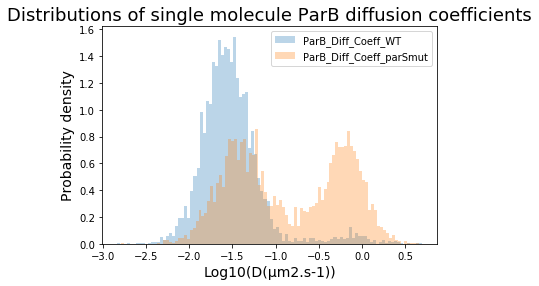

In [4]:
kwargs = dict(histtype='stepfilled', density=True, alpha=0.3, bins=100)

plt.hist(np.log10(D_WT), **kwargs);
plt.hist(np.log10(D_parSmut), **kwargs);
plt.legend([D_WT_name,D_parSmut_name ])
plt.xlabel('Log10(D(µm2.s-1))', fontsize = 14)
plt.ylabel('Probability density', fontsize = 14)
plt.title('Distributions of single molecule ParB diffusion coefficients', fontsize = 18)
print('done')

## Assignment 4

- How many populations do you see for each experiment?
- How do the diffusion coefficients of ParB compare with the ones of a free GFP diffusing in water or in Escherichia coli cytoplasm?
    - Give an explanation.
- What happens in the mutant where ParB cannot bind to its recognition sequence parS?
    - Try giving an explanation for the two populations observed.

### Extract populations diffusion coefficient

In [5]:
# Define functions to fit the data
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)
print('done')

done


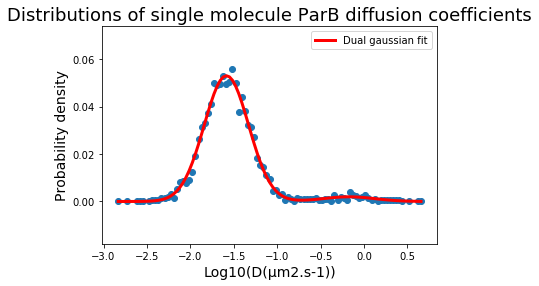


 FITTING RESULTS:
 
                  mu     sigma         A
Population                              
1          -1.584591  0.256165  0.053008
2          -0.172870  0.299697  0.001974
done


In [7]:
# Compute normalized histograms (sum of bins = 1)
bins = np.linspace(np.log10(D_WT).min(),np.log10(D_WT).max(), 100) # Linear spacing of bins in log space
widths = (bins[1:] - bins[:-1]) # set uniform bin size
histo = np.histogram(np.log10(D_WT), bins=bins, density=True)
histo_norm = histo[0]
histo_norm = histo_norm / histo_norm.sum() # normlize histogram

x = bins[:-1]
y = histo_norm
x = x[np.nonzero(y)]
y = y[np.nonzero(y)]

plt.scatter(x, y)

# Fit the histogram with custom Gaussian function
expected=(-1.5,.2,0.06,-0.2,.2,0.01)
params,cov=curve_fit(bimodal, x, y, expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='Dual gaussian fit')
legend()
plt.xlabel('Log10(D(µm2.s-1))', fontsize = 14)
plt.ylabel('Probability density', fontsize = 14)
plt.title('Distributions of single molecule ParB diffusion coefficients', fontsize = 18)
plt.show()

# Format fitting results into dataframe to display
df1 = pd.DataFrame([params[0:3]],columns=list(['mu','sigma','A']))
df2 = pd.DataFrame([params[3:6]], columns=list(['mu','sigma','A']))
df = pd.concat([df1, df2], ignore_index=True)
df.index = ['1', '2']
df.index.name="Population"
print('\n FITTING RESULTS:\n ')
print(df)  
print('done')


## Assignment 5

- Give the diffusion coefficients of each population in µm²/sec.
- Calculate the fraction each population represents?

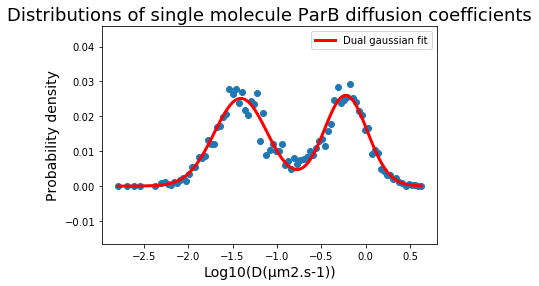


 FITTING RESULTS:
 
                  mu     sigma         A
Population                              
1          -1.407169  0.299094  0.025166
2          -0.225165  0.243259  0.026037


In [8]:

# Compute normalized histograms (sum of bins = 1)
bins = np.linspace(np.log10(D_parSmut).min(),np.log10(D_parSmut).max(), 100) # Linear spacing of bins in log space
widths = (bins[1:] - bins[:-1]) # set uniform bin size
histo = np.histogram(np.log10(D_parSmut), bins=bins, density=True)
histo_norm = histo[0]
histo_norm = histo_norm / histo_norm.sum() # normlize histogram

x = bins[:-1]
y = histo_norm
x = x[np.nonzero(y)]
y = y[np.nonzero(y)]

plt.scatter(x, y)

# Fit the histogram with custom Gaussian function
expected=(-1.5,.2,0.06,-0.2,.2,0.01)
params,cov=curve_fit(bimodal, x, y, expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='Dual gaussian fit')
legend()
plt.xlabel('Log10(D(µm2.s-1))', fontsize = 14)
plt.ylabel('Probability density', fontsize = 14)
plt.title('Distributions of single molecule ParB diffusion coefficients', fontsize = 18)
plt.show()

# Format fitting results into dataframe to display
df1 = pd.DataFrame([params[0:3]],columns=list(['mu','sigma','A']))
df2 = pd.DataFrame([params[3:6]], columns=list(['mu','sigma','A']))
df = pd.concat([df1, df2], ignore_index=True)
df.index = ['1', '2']
df.index.name="Population"
print('\n FITTING RESULTS:\n ')
print(df)  

## Assignment 6

- Give the diffusion coefficients of each population in µm²/sec.
- Calculate the fraction each population represents?